In [109]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pyodbc 

import warnings
warnings.filterwarnings("ignore")

In [110]:
conn_str = (
    'DRIVER={ODBC Driver 17 for SQL Server};'
    'SERVER=DESKTOP-F5UU456\SQLEXPRESS;'
    'DATABASE=instant;'
    'Trusted_Connection=yes;'
)


In [111]:
conn = pyodbc.connect(conn_str)

In [112]:
query = "SELECT * FROM dbo.shopping_trends"
df = pd.read_sql(query, conn)

df 

,Customer_ID,Age,Gender,Item_Purchased,Category,Purchase_Amount_USD,Location,Size,Color,Season,Review_Rating,Subscription_Status,Payment_Method,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Preferred_Payment_Method,Frequency_of_Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


In [113]:
# read shape data
df.shape

(3900, 19)

In [114]:
# check data types
df.dtypes

Customer_ID                   int64
Age                           int64
Gender                       object
Item_Purchased               object
Category                     object
Purchase_Amount_USD           int64
Location                     object
Size                         object
Color                        object
Season                       object
Review_Rating               float64
Subscription_Status          object
Payment_Method               object
Shipping_Type                object
Discount_Applied             object
Promo_Code_Used              object
Previous_Purchases            int64
Preferred_Payment_Method     object
Frequency_of_Purchases       object
dtype: object

In [115]:
# check nulls values
df.isnull().sum()

Customer_ID                 0
Age                         0
Gender                      0
Item_Purchased              0
Category                    0
Purchase_Amount_USD         0
Location                    0
Size                        0
Color                       0
Season                      0
Review_Rating               0
Subscription_Status         0
Payment_Method              0
Shipping_Type               0
Discount_Applied            0
Promo_Code_Used             0
Previous_Purchases          0
Preferred_Payment_Method    0
Frequency_of_Purchases      0
dtype: int64

In [116]:
# check duplication 
df.duplicated().sum()

0

In [117]:
# show stitstics
df.describe()

,Customer_ID,Age,Purchase_Amount_USD,Review_Rating,Previous_Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [118]:
df = df.drop('Customer_ID', axis=1)

In [119]:
df['Total_Sales'] = df['Purchase_Amount_USD'].sum()

In [120]:
df_numeric = df.select_dtypes(include = ['float64', 'int64'])


In [121]:
crosstab_result = pd.crosstab(df['Gender'] , df['Item_Purchased'])
crosstab_result 

Item_Purchased,Backpack,Belt,Blouse,Boots,Coat,Dress,Gloves,Handbag,Hat,Hoodie,...,Scarf,Shirt,Shoes,Shorts,Skirt,Sneakers,Socks,Sunglasses,Sweater,T-shirt
Gender,,,,,,,,,,,,,,,,,,,,,
Female,37,55,66,50,47,52,37,58,52,51,...,45,59,48,48,49,42,58,56,50,46
Male,106,106,105,94,114,114,103,95,102,100,...,112,110,102,109,109,103,101,105,114,101


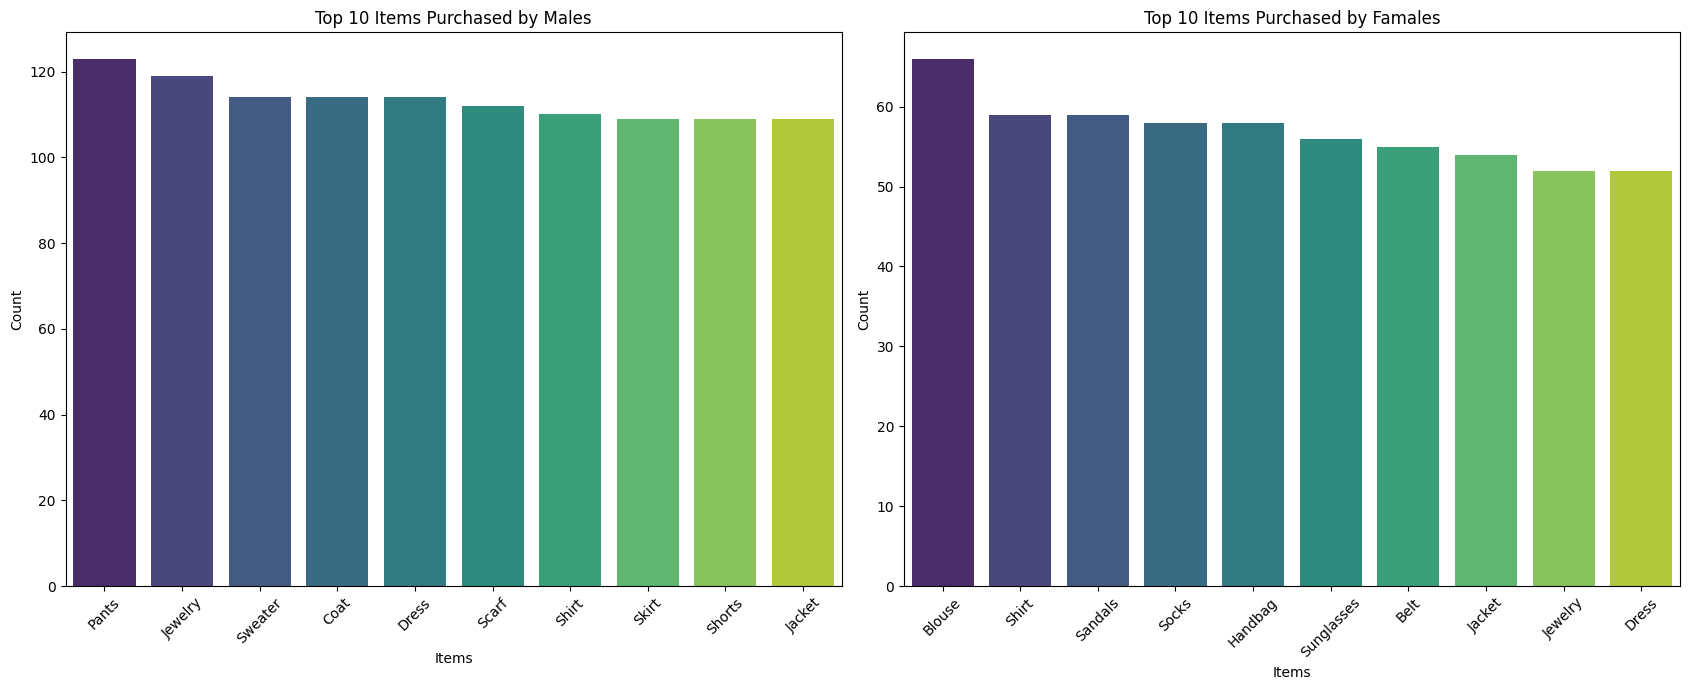

In [122]:
males_shooping = crosstab_result.loc['Male'].sort_values(ascending=False).head(10)
famales_shooping = crosstab_result.loc['Female'].sort_values(ascending=False).head(10)

plt.figure(figsize=(17 , 7 ))

plt.subplot(1 , 2 , 1)
sns.barplot(x = males_shooping.index , y = males_shooping.values , palette='viridis')
plt.title('Top 10 Items Purchased by Males')
plt.xlabel('Items')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(1 , 2 , 2)
sns.barplot(x=famales_shooping.index, y=famales_shooping.values , palette='viridis')
plt.title('Top 10 Items Purchased by Famales')
plt.xlabel('Items')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [123]:
crosstab_result = pd.crosstab(df['Gender'] , df['Category'])
crosstab_result

Category,Accessories,Clothing,Footwear,Outerwear
Gender,,,,
Female,392,556,199,101
Male,848,1181,400,223


Text(0, 0.5, 'Count')

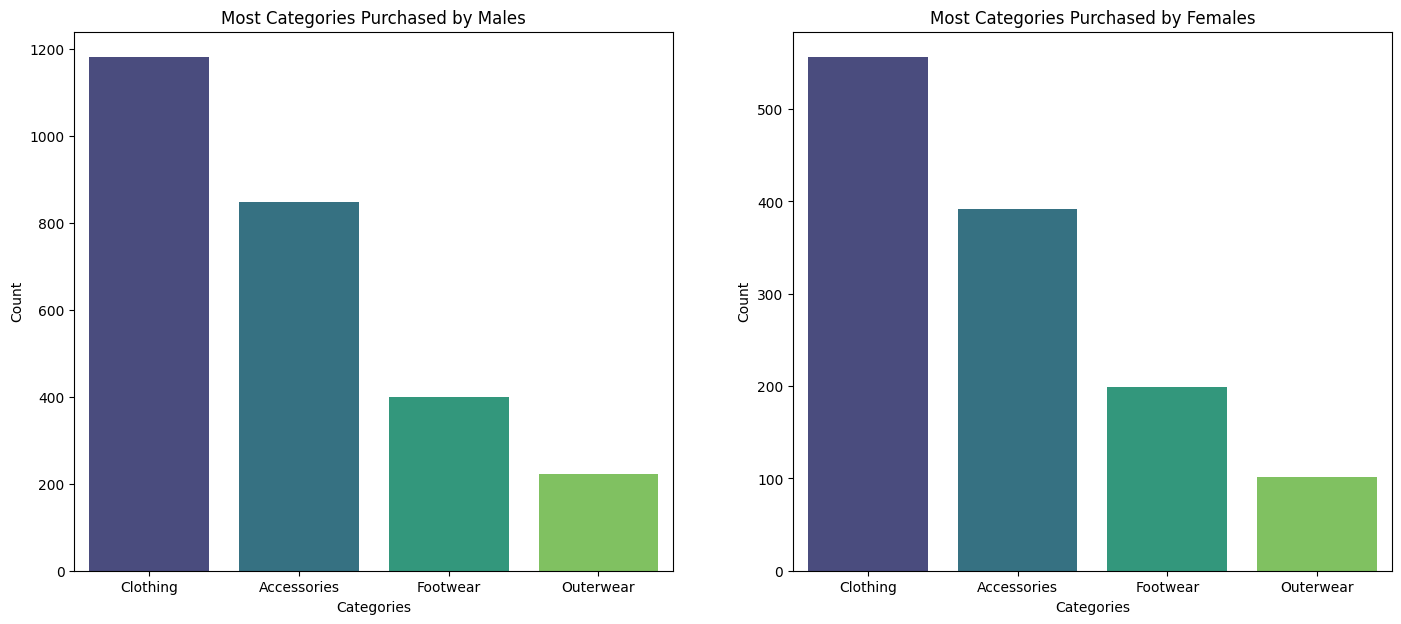

In [124]:
males_shooping = crosstab_result.loc['Male'].sort_values(ascending=False)
females_shooping = crosstab_result.loc['Female'].sort_values(ascending=False)

plt.figure(figsize=(17, 7)) 

plt.subplot(1, 2, 1)
sns.barplot(x = males_shooping.index , y = males_shooping.values , palette='viridis')
plt.title('Most Categories Purchased by Males')
plt.xlabel('Categories')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.barplot(x = females_shooping.index , y = females_shooping.values , palette='viridis')
plt.title('Most Categories Purchased by Females')
plt.xlabel('Categories')
plt.ylabel('Count')


In [125]:
crosstab_result = pd.crosstab(df['Gender'], df['Size'])
crosstab_result

Size,L,M,S,XL
Gender,,,,
Female,337,590,187,134
Male,716,1165,476,295


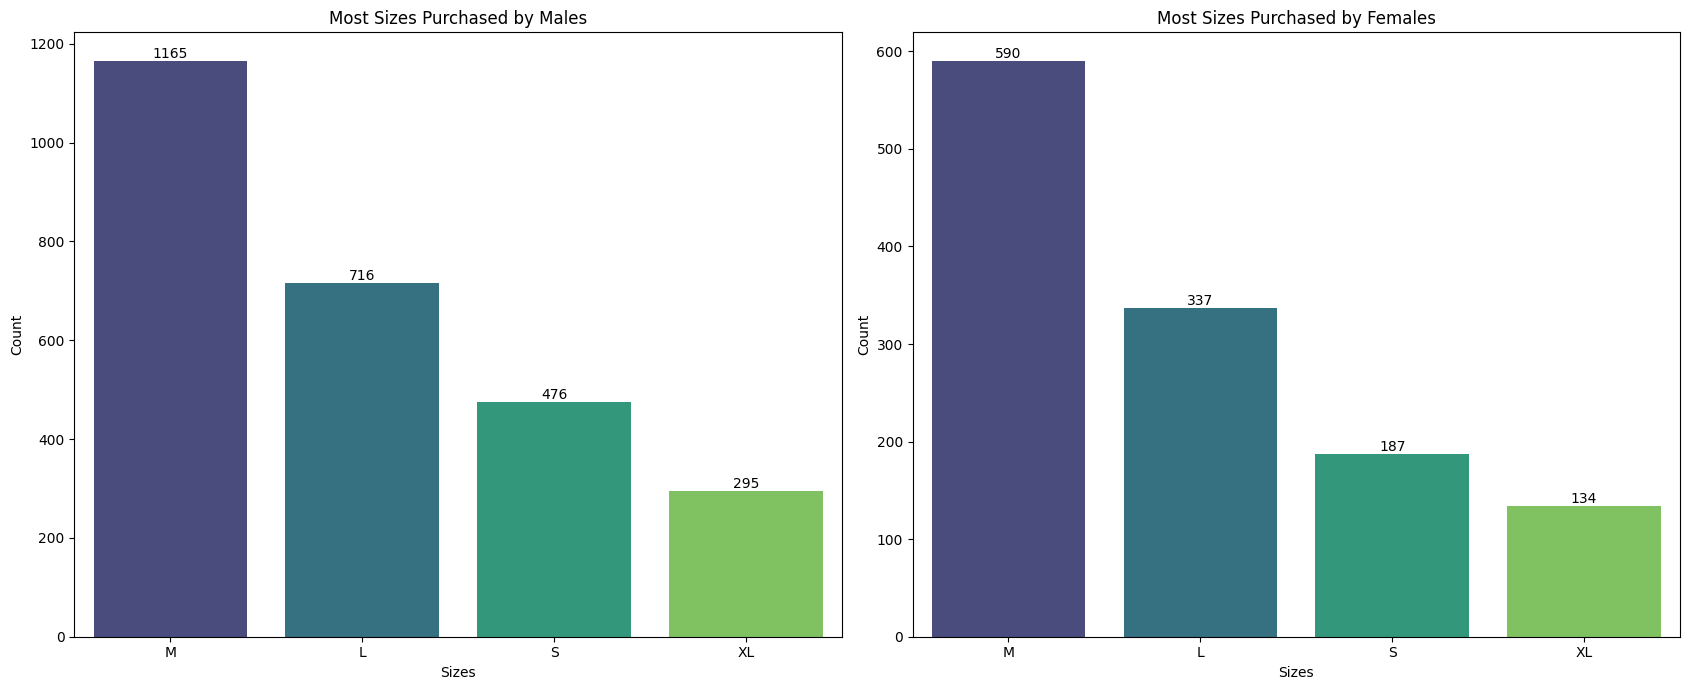

In [126]:
males_size = crosstab_result.loc['Male'].sort_values(ascending=False)
females_size = crosstab_result.loc['Female'].sort_values(ascending=False)

plt.figure(figsize=(17, 7))
plt.subplot(1, 2, 1)
ax1 = sns.barplot(x = males_size.index , y = males_size.values , palette='viridis')
plt.title('Most Sizes Purchased by Males')
plt.xlabel('Sizes')
plt.ylabel('Count')

for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.0f}' , 
                 (p.get_x() + p.get_width() / 2 , p.get_height()),
                 ha = 'center' , va='bottom', fontsize=10, color='black')

plt.subplot(1, 2, 2)
ax2 = sns.barplot(x = females_size.index , y = females_size.values , palette='viridis')
plt.title('Most Sizes Purchased by Females')
plt.xlabel('Sizes')
plt.ylabel('Count')

for p in ax2.patches:
    ax2.annotate(f'{p.get_height():.0f}',
                 (p.get_x() + p.get_width() / 2 , p.get_height()),
                 ha = 'center' , va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

In [127]:
most_item_sold = df.groupby('Item_Purchased')['Purchase_Amount_USD'].sum().sort_values(ascending=False).head(15)
most_item_sold

Item_Purchased
Blouse        10410
Shirt         10332
Dress         10320
Pants         10090
Jewelry       10010
Sunglasses     9649
Belt           9635
Scarf          9561
Sweater        9462
Shorts         9433
Skirt          9402
Hat            9375
Coat           9275
Socks          9252
Jacket         9249
Name: Purchase_Amount_USD, dtype: int64

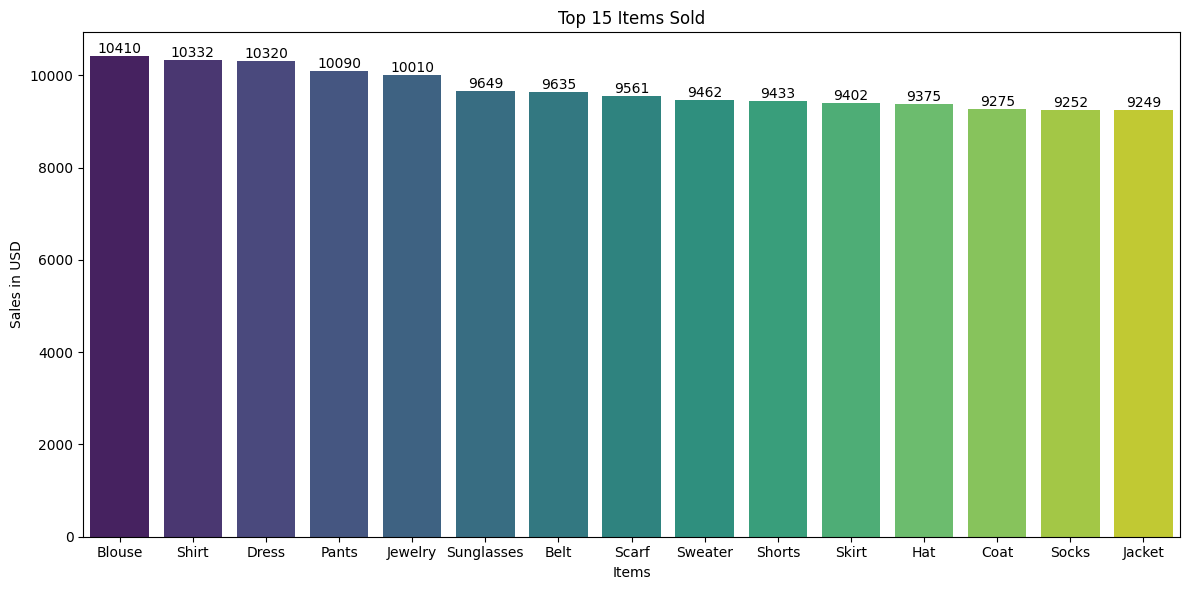

In [128]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x = most_item_sold.index , y = most_item_sold.values , palette='viridis')
plt.title('Top 15 Items Sold')
plt.xlabel('Items')
plt.ylabel('Sales in USD')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2 , p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')
    

plt.tight_layout()
plt.show()

In [129]:
most_category_sold = df.groupby('Category')['Purchase_Amount_USD'].sum().sort_values(ascending=False)
most_category_sold

Category
Clothing       104264
Accessories     74200
Footwear        36093
Outerwear       18524
Name: Purchase_Amount_USD, dtype: int64

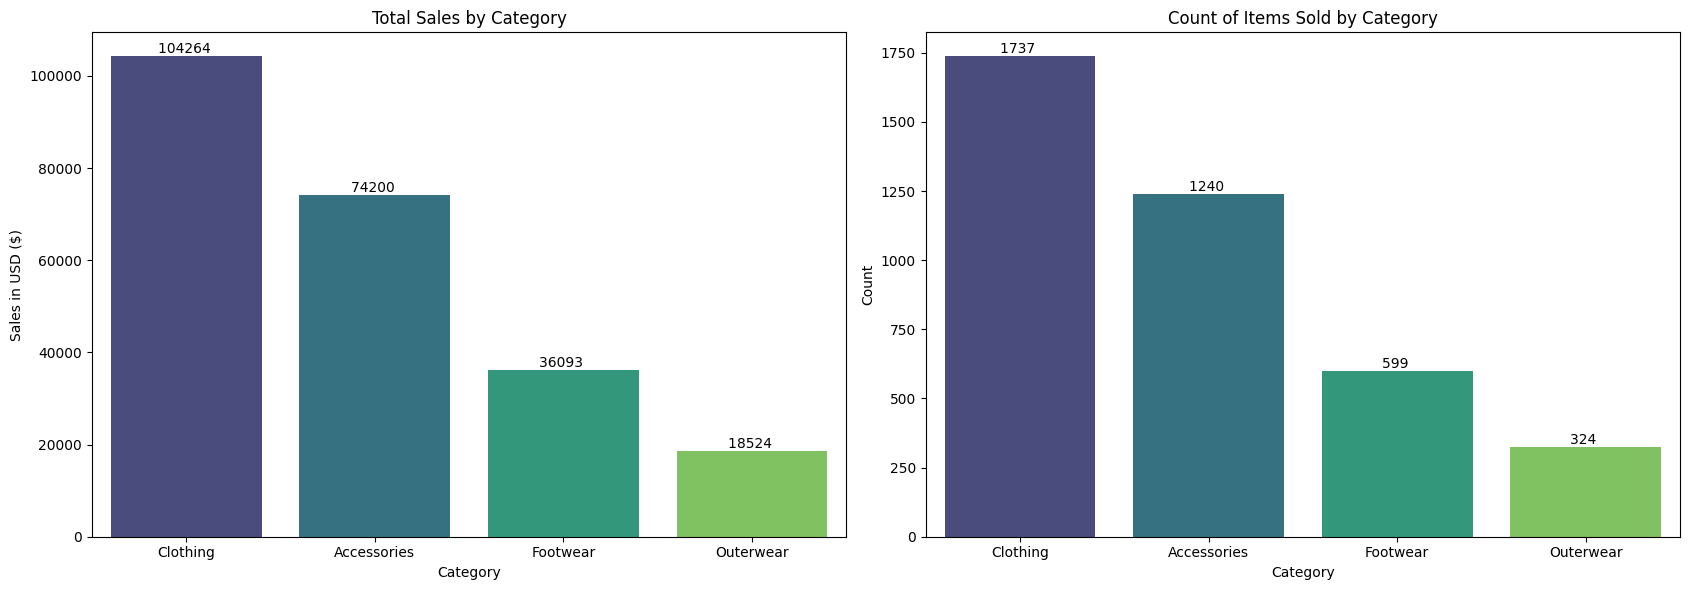

In [130]:
plt.figure(figsize=(17, 6))

plt.subplot(1, 2, 1)
ax1 = sns.barplot(x = most_category_sold.index , y = most_category_sold.values , palette='viridis')
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Sales in USD ($)')

for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.0f} ', 
                 (p.get_x() + p.get_width() / 2, p.get_height()), 
                 ha='center', va='bottom', fontsize=10, color='black')

plt.subplot(1, 2, 2)
ax2 = sns.countplot(data=df, x='Category', order=df['Category'].value_counts().index, palette='viridis')
plt.title('Count of Items Sold by Category')
plt.xlabel('Category')
plt.ylabel('Count')

for p in ax2.patches:
    ax2.annotate(f'{p.get_height():.0f} ', 
                 (p.get_x() + p.get_width() / 2, p.get_height()), 
                 ha='center', va='bottom', fontsize=10, color='black')


plt.tight_layout()
plt.show()

In [131]:
most_season_sold = df.groupby('Season')['Purchase_Amount_USD'].sum().sort_values(ascending=False)
most_season_sold

Season
Fall      60018
Spring    58679
Winter    58607
Summer    55777
Name: Purchase_Amount_USD, dtype: int64

In [132]:
fig = px.pie(most_season_sold, values=most_season_sold.values, names=most_season_sold.index, title='Total Sales by Season')
fig.show()

In [175]:
most_item_Rating = df.groupby('Item_Purchased')['Review_Rating'].mean().sort_values(ascending=False).head(15)
most_item_Rating

Item_Purchased
Gloves      3.864286
Sandals     3.841250
Boots       3.812500
Hat         3.806494
T-shirt     3.782993
Skirt       3.782278
Handbag     3.775163
Sweater     3.767073
Jacket      3.763190
Belt        3.761491
Sneakers    3.757931
Jewelry     3.756140
Dress       3.754819
Backpack    3.752448
Socks       3.750943
Name: Review_Rating, dtype: float64

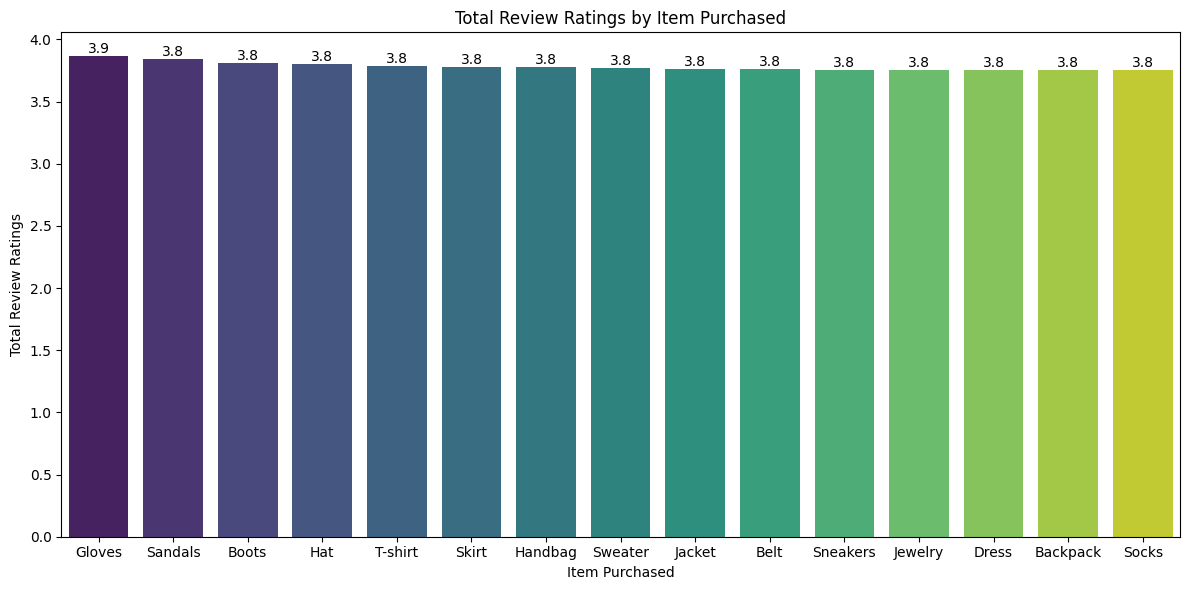

In [177]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=most_item_Rating.index, y=most_item_Rating.values, palette='viridis')
plt.title('Total Review Ratings by Item Purchased')
plt.xlabel('Item Purchased')
plt.ylabel('Total Review Ratings')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')
plt.tight_layout()
plt.show()

In [133]:
most_category_Rating = df.groupby('Category')['Review_Rating'].sum().sort_values(ascending=False)
most_category_Rating

Category
Clothing       6467.099999
Accessories    4673.100001
Footwear       2270.600001
Outerwear      1214.000000
Name: Review_Rating, dtype: float64

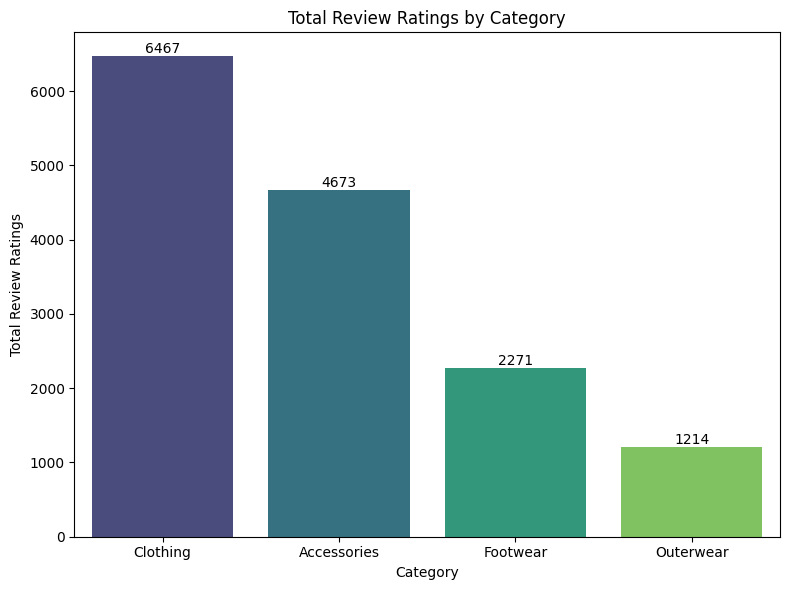

In [144]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=most_category_Rating.index, y=most_category_Rating.values, palette='viridis')
plt.title('Total Review Ratings by Category')
plt.xlabel('Category')
plt.ylabel('Total Review Ratings')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2 , p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

In [135]:
Subscription_Status = df.groupby('Subscription_Status')['Purchase_Amount_USD'].sum().sort_values(ascending=False)

Discount_Applied  = df.groupby('Discount_Applied')['Purchase_Amount_USD'].sum().sort_values(ascending=False)


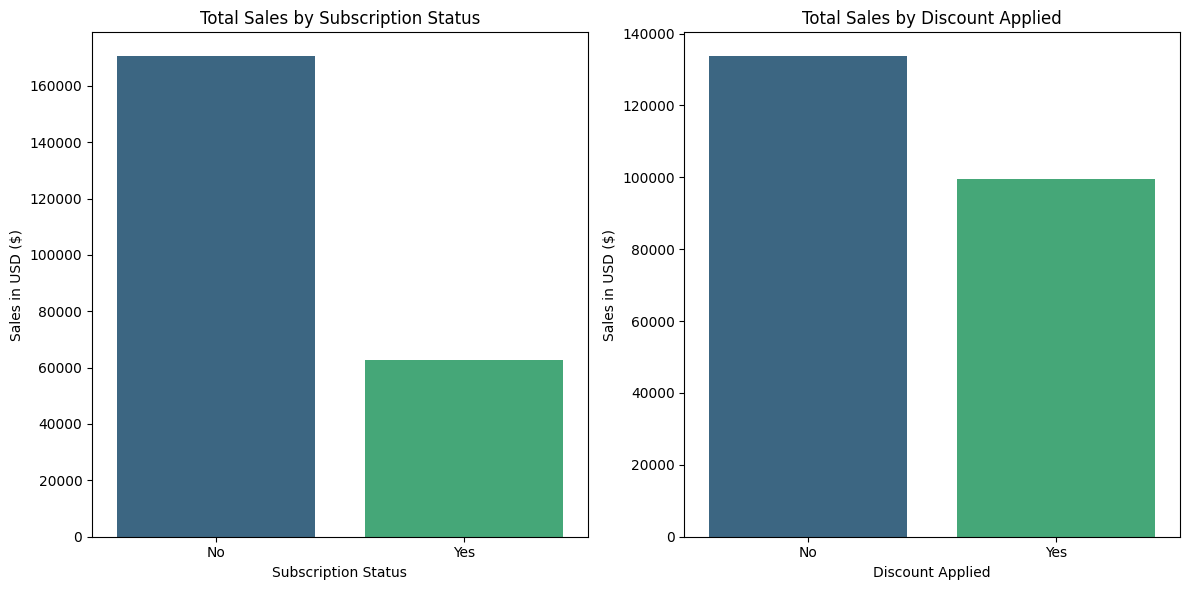

In [136]:
plt.figure(figsize=(12, 6))

plt.subplot(1 , 2 , 1)
sns.barplot(x=Subscription_Status.index, y=Subscription_Status.values, palette='viridis')
plt.title('Total Sales by Subscription Status')
plt.xlabel('Subscription Status')
plt.ylabel('Sales in USD ($)')

plt.subplot(1 , 2 , 2)
sns.barplot(x=Discount_Applied.index, y=Discount_Applied.values, palette='viridis')
plt.title('Total Sales by Discount Applied')
plt.xlabel('Discount Applied')
plt.ylabel('Sales in USD ($)')

plt.tight_layout()
plt.show()

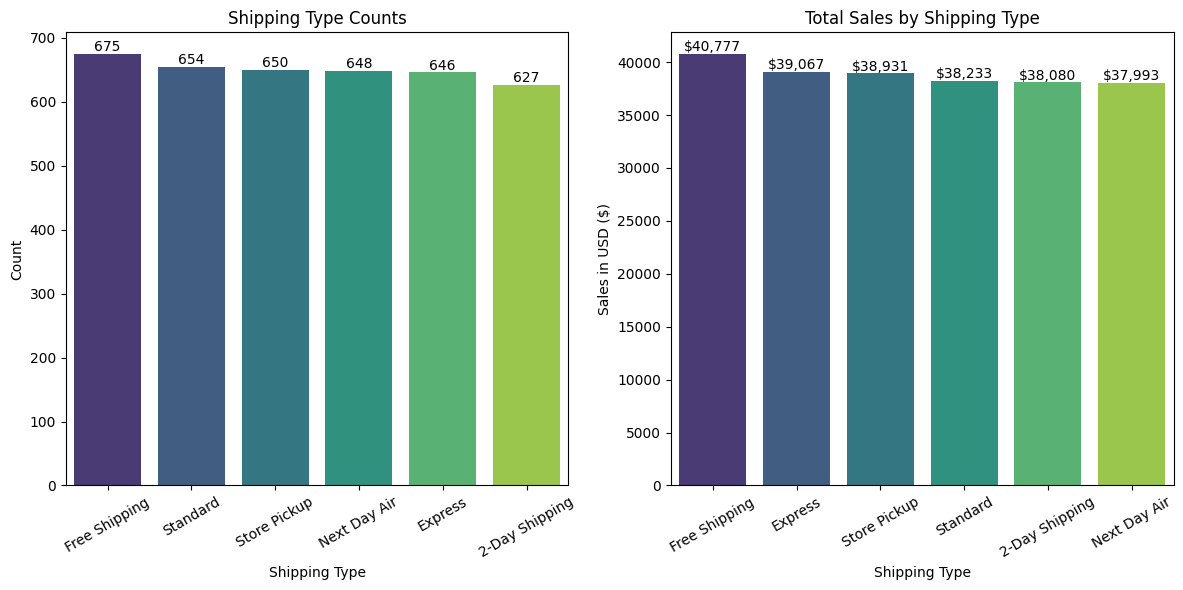

In [137]:
Shipping_Counts = df['Shipping_Type'].value_counts()
Shipping_Type = df.groupby('Shipping_Type')['Purchase_Amount_USD'].sum().sort_values(ascending=False)


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
ax1 = sns.barplot(x=Shipping_Counts.index, y=Shipping_Counts.values, palette='viridis')
plt.title('Shipping Type Counts')
plt.xlabel('Shipping Type')
plt.ylabel('Count')
plt.xticks(rotation = 30)

for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.subplot(1, 2, 2)
ax2 = sns.barplot(x=Shipping_Type.index, y=Shipping_Type.values, palette='viridis')
plt.title('Total Sales by Shipping Type')
plt.xlabel('Shipping Type')
plt.ylabel('Sales in USD ($)')
plt.xticks(rotation = 30)

for p in ax2.patches:
    ax2.annotate(f'${p.get_height():,.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.tight_layout()
plt.show()

In [150]:
most_loaction_Sales = df.groupby('Location')['Purchase_Amount_USD'].sum().sort_values(ascending=False).head(15)
most_loaction_Sales

Location
Montana          5784
Illinois         5617
California       5605
Idaho            5587
Nevada           5514
Alabama          5261
New York         5257
North Dakota     5220
West Virginia    5174
Nebraska         5172
New Mexico       5014
Minnesota        4977
Pennsylvania     4926
Mississippi      4883
Alaska           4867
Name: Purchase_Amount_USD, dtype: int64

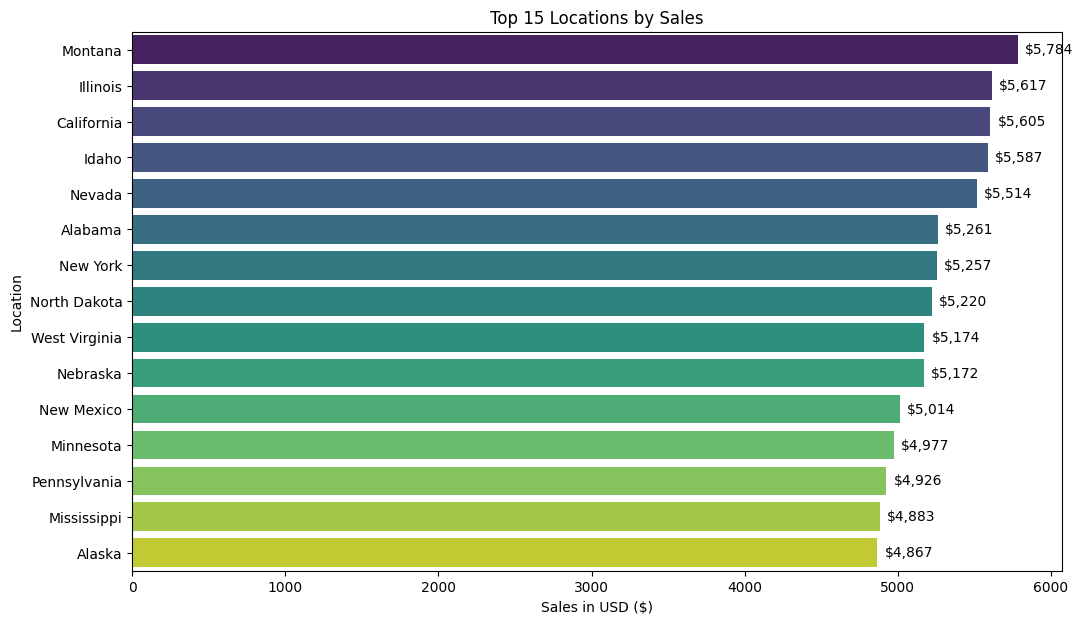

In [161]:
plt.figure(figsize=(12, 7))
ax = sns.barplot(y=most_loaction_Sales.index, x=most_loaction_Sales.values, palette='viridis')
plt.title('Top 15 Locations by Sales')
plt.xlabel('Sales in USD ($)')
plt.ylabel('Location')


for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'${width:,.0f}', 
                (width, p.get_y() + p.get_height()/2.),
                ha='left', va='center',
                xytext=(5, 0),
                textcoords='offset points',
                fontsize=10)


plt.show()

In [179]:
df['Location'].value_counts().head(15)

Location
Montana         96
California      95
Idaho           93
Illinois        92
Alabama         89
Minnesota       88
Nebraska        87
New York        87
Nevada          87
Maryland        86
Delaware        86
Vermont         85
Louisiana       84
North Dakota    83
Missouri        81
Name: count, dtype: int64

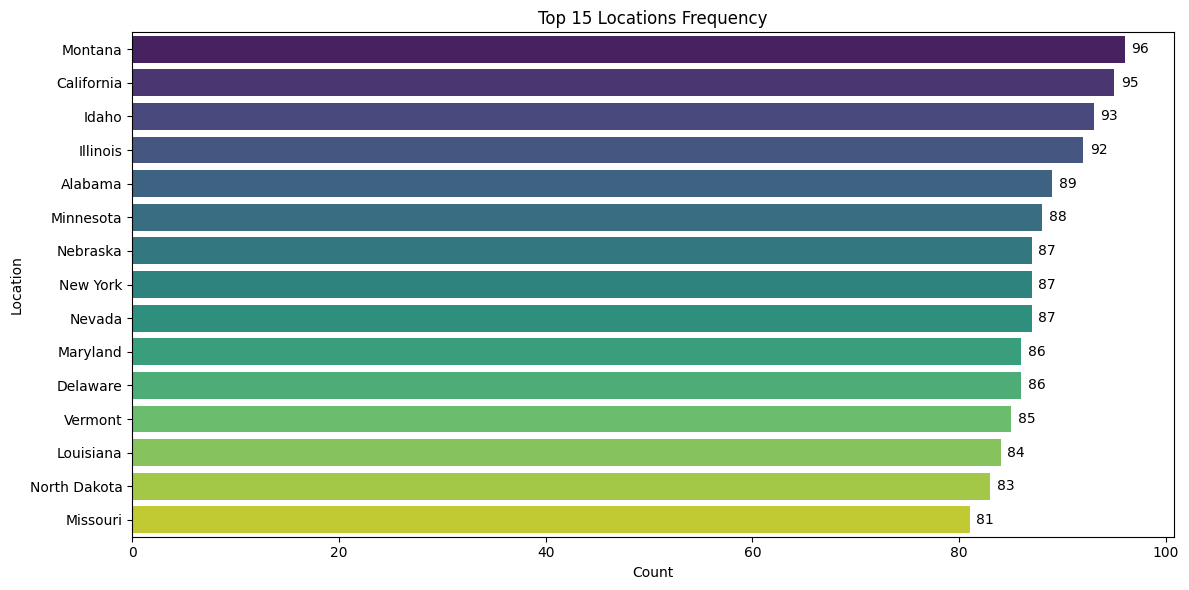

In [172]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, y='Location', order=df['Location'].value_counts().head(15).index, palette='viridis')
plt.title('Top 15 Locations Frequency')
plt.xlabel('Count')
plt.ylabel('Location')
for p in ax.patches:
    ax.annotate(f'{p.get_width():.0f}', 
                (p.get_width(), p.get_y() + p.get_height()/2.),
                ha='left', va='center',
                xytext=(5, 0),
                textcoords='offset points',
                fontsize=10)
plt.tight_layout()
plt.show()